# Identify Fraud from Enron Email

In [58]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Abstract

Once successful and dominant company in the energy business, but has fallen because they tried to hide company losses and avoid taxes by creating made-up entities, known since as the Enron scandal. The most infamous name associated with this scandal is Kenneth Lay, who is on trial as of januray 2006. he is charged on 11 counts ranging from insider trading to bank fraud. 

The goal of this project is to identify Enron employees who may have committed fraud based on the public Enron financial and email dataset. To find out person of interest, we can explore many features and apply specific algorithms. Also, we should validate the performance by evaluating metircs. Through this process, we can gain useful insights from dataset.

- <a href='#1.-Data-exploration'>1. Data exploration</a>
- <a href='#2.-Outlier-Investigation'>2. Outlier Investigation</a>
- <a href='#3.-Feature-Selection'>3. Feature Selection</a>
- <a href='#4.-Algorithms'>4. Algorithms</a>
- <a href='#5.-Evaluation'>5. Evaluation</a>
- <a href='#Appendix'>Appendix</a>

## 1. Data exploration

I looked through dataset to describe overall statistics and find out what features can help identifying fraud from Enron email. I have financial and email dataset labeled who is POI. With 21 features, I categorized list of features as following:
<table>
  <tr>
    <th rowspan="2">Label</th>
    <th colspan="2">Financial</th>
    <th rowspan="2">Email (6 features)</th>
  </tr>
  <tr>
    <td>payments (10 features)</td>
    <td>stock value (4 features)</td>
  </tr>
  <tr>
    <td><li>persons-of-interest</li></td>
    <td>
<ul>
<li>salary</li>
<li>bonus</li>
<li>long_term_incentive</li>
<li>deferral_payments</li>
<li>expenses</li>
<li>deferred_income</li>
<li>director_fees</li>
<li>loan_advances</li>
<li>other</li>
<li>total_payments</li>
</ul>
</td>
    <td>
<ul>
<li>restricted_stock</li>
<li>exercised_stock_options</li>
<li>restricted_stock_deferred</li>
<li>total_stock_value</li>
</ul>
</td>
    <td>
    <ul><li>from_messages</li>
<li>to_messages</li>
<li>shared_receipt_with_poi</li>
<li>from_this_person_to_poi</li>
<li>email_address</li>
<li>from_poi_to_this_person</li></ul>
</td>
  </tr>
</table>

The first 5 rows of dataset:


In [77]:
# %run ./exploration.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
from tester import test_classifier, dump_classifier_and_data

features_list = ['poi', 'salary', 'bonus','long_term_incentive','deferral_payments',
                 'expenses','deferred_income','director_fees','loan_advances','other',
                 'restricted_stock', 'exercised_stock_options','restricted_stock_deferred', 
               'shared_receipt_with_poi']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
import pandas as pd
import numpy as np

df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=np.float)
df.reset_index(level=0, inplace=True)
columns = list(df.columns)
columns[0] = 'name'
df.columns = columns
df.fillna(0, inplace=True)
df.head()



,name,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
0,ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,...,0,2195,152,65,0,0,-3081055,304805,phillip.allen@enron.com,47
1,BADUM JAMES P,0,0,178980,182466,257817,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
2,BANNANTINE JAMES M,477,566,0,916197,4046157,0,1757552,465,-560222,...,0,29,864523,0,0,0,-5104,0,james.bannantine@enron.com,39
3,BAXTER JOHN C,267102,0,1295738,5634343,6680544,1200000,3942714,0,0,...,0,0,2660303,0,0,0,-1386055,1586055,NaN,0
4,BAY FRANKLIN R,239671,0,260455,827696,0,400000,145796,0,-82782,...,0,0,69,0,0,0,-201641,0,frank.bay@enron.com,0


Overall statistics of dataset:

In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bonus,146,1333474.232877,8094029.239637,0,0.00,300000.0,800000.00,97343619
deferral_payments,146,438796.520548,2741325.337926,-102500,0.00,0.0,9684.50,32083396
deferred_income,146,-382762.205479,2378249.890202,-27992891,-37926.00,0.0,0.00,0
director_fees,146,19422.486301,119054.261157,0,0.00,0.0,0.00,1398517
email_address,146,0.000000,0.000000,0,0.00,0.0,0.00,0
exercised_stock_options,146,4182736.198630,26070399.807568,0,0.00,608293.5,1714220.75,311764000
expenses,146,70748.267123,432716.319438,0,0.00,20182.0,53740.75,5235198
from_messages,146,358.602740,1441.259868,0,0.00,16.5,51.25,14368
from_poi_to_this_person,146,38.226027,73.901124,0,0.00,2.5,40.75,528
from_this_person_to_poi,146,24.287671,79.278206,0,0.00,0.0,13.75,609


Number of person-of-interest and non person-of-interest:

In [61]:
bypoi = df.groupby(['poi'])
print bypoi['poi'].aggregate([len])


     len
poi     
0    128
1     18


<div> </div>

## 2. Outlier Investigation

There was one outlier and two correction in the dataset.
- outlier : datapoint of salary 26,704,229 is clear outlier. The sum of all salaries seem to be parsed accidently from pdf file, so I deleted it.

In [62]:
del data_dict['TOTAL']

- incorrect numbers : BELFER ROBERT, BHATNAGAR SANJAY records were incorrect, so I updated value according to Enron Statement of Financial Affairs pdf file.

In [63]:
payment_cols = ['salary', 'bonus','long_term_incentive','deferral_payments','expenses','deferred_income','director_fees','loan_advances','other']
stock_cols = ['restricted_stock', 'exercised_stock_options','restricted_stock_deferred']
def check_consistency(df):
    consistency = pd.DataFrame()
    consistency['name'] = df['name']
    consistency['total1'] = df[payment_cols].sum(axis=1)
    consistency['total2'] = df[stock_cols].sum(axis=1)
    consistency['consistent_payments'] = (consistency['total1'] == df['total_payments'])
    consistency['consistent_stockvalue'] = (consistency['total2'] == df['total_stock_value'])
    checks = consistency[(consistency['consistent_payments'] == False) | (consistency['consistent_stockvalue'] == False)]['name'].tolist()

    return checks
    

check_names = check_consistency(df)

print check_names
#if len(check_names) > 0:
payment_cols.append('total_payments')
df[df['name'].isin(check_names)][payment_cols]

['BELFER ROBERT', 'BHATNAGAR SANJAY']


,salary,bonus,long_term_incentive,deferral_payments,expenses,deferred_income,director_fees,loan_advances,other,total_payments
8,0,0,0,-102500,0,0,3285,0,0,102500
11,0,0,0,0,0,0,137864,0,137864,15456290


In [64]:
#if len(check_names) > 0:
stock_cols.append('total_stock_value')
df[df['name'].isin(check_names)][stock_cols]

,restricted_stock,exercised_stock_options,restricted_stock_deferred,total_stock_value
8,0,3285,44093,-44093
11,-2604490,2604490,15456290,0


In [65]:
payment_cols.remove('total_payments')
stock_cols.remove('total_stock_value')

data_dict['BELFER ROBERT']['deferred_income'] = -102500
data_dict['BELFER ROBERT']['deferral_payments'] = 0
data_dict['BELFER ROBERT']['expenses'] = 3285
data_dict['BELFER ROBERT']['director_fees'] = 102500
data_dict['BELFER ROBERT']['total_payments'] = 3285

data_dict['BHATNAGAR SANJAY']['total_payments'] =137864
data_dict['BHATNAGAR SANJAY']['expenses'] =137864
data_dict['BHATNAGAR SANJAY']['other'] = 0
data_dict['BHATNAGAR SANJAY']['director_fees'] = 0

data_dict['BELFER ROBERT']['exercised_stock_options'] = 0
data_dict['BELFER ROBERT']['restricted_stock'] = 44093
data_dict['BELFER ROBERT']['restricted_stock_deferred'] = -44093
data_dict['BELFER ROBERT']['total_stock_value'] = 0

data_dict['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
data_dict['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
data_dict['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
data_dict['BHATNAGAR SANJAY']['total_stock_value'] = 15456290

## 3. Feature Selection

- ### new features (fraction_from_poi, fraction_to_poi)
    I created new features: fraction_from_poi, fraction_to_poi. **Number of messages related to POI are divided by the total number of messages to or from this person**. 
    The figure on the left showed scatter plot of old features that have sparse POIs(red points). On the other hand, POIs(red points) of the left figure are denser. 
    

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


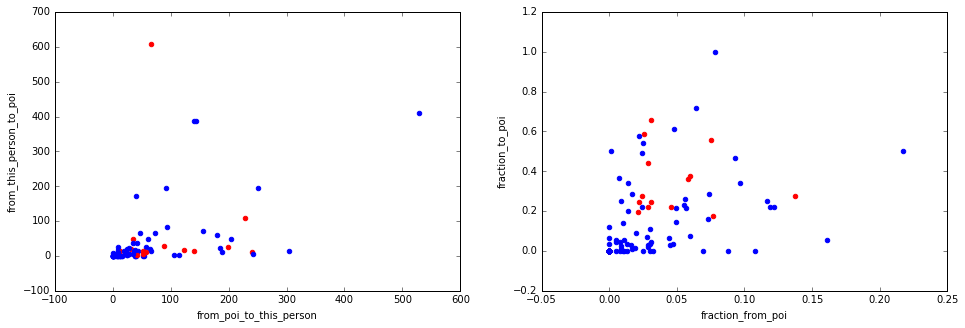

In [66]:
def compute_fraction( poi_messages, all_messages ):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
   """
    import math
    if poi_messages == 0 or all_messages == 0 or math.isnan(float(poi_messages)) or math.isnan(float(all_messages)) :
        return 0.
    fraction = 0.
    fraction = float(poi_messages) / float(all_messages) 
    return fraction

submit_dict = {}
for name in data_dict:

    data_point = data_dict[name]

    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = compute_fraction( from_poi_to_this_person, to_messages )
    data_point["fraction_from_poi"] = round(fraction_from_poi,3)
    
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = compute_fraction( from_this_person_to_poi, from_messages )
    submit_dict[name]={"from_poi_to_this_person":fraction_from_poi,
                       "from_this_person_to_poi":fraction_to_poi}
    data_point["fraction_to_poi"] = round(fraction_to_poi, 3)

    ## append two features to the list    
if not ('fraction_from_poi' in set(features_list)):
    features_list.append('fraction_from_poi')
if not ('fraction_to_poi' in set(features_list)):
    features_list.append('fraction_to_poi')

%pylab inline

import matplotlib.pyplot as plt
 
def graph_scatter_with_poi(var1, var2):
    for name in data_dict:
        point = data_dict[name]
        poi = point['poi']
        x = point[var1]
        y = point[var2]

        if poi:
            plt.scatter( x, y, color='red')
        else:
            plt.scatter( x, y, color='blue')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.figure(1, figsize=(16, 5))
plt.subplot(1,2,1) 
graph_scatter_with_poi('from_poi_to_this_person', 'from_this_person_to_poi')
plt.subplot(1,2,2) 
graph_scatter_with_poi('fraction_from_poi', 'fraction_to_poi')

An example of employee with new features:

In [67]:
data_dict['SKILLING JEFFREY K']

{'bonus': 5600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'jeff.skilling@enron.com',
 'exercised_stock_options': 19250000,
 'expenses': 29336,
 'fraction_from_poi': 0.024,
 'fraction_to_poi': 0.278,
 'from_messages': 108,
 'from_poi_to_this_person': 88,
 'from_this_person_to_poi': 30,
 'loan_advances': 'NaN',
 'long_term_incentive': 1920000,
 'other': 22122,
 'poi': True,
 'restricted_stock': 6843672,
 'restricted_stock_deferred': 'NaN',
 'salary': 1111258,
 'shared_receipt_with_poi': 2042,
 'to_messages': 3627,
 'total_payments': 8682716,
 'total_stock_value': 26093672}

### intelligently select feature


- automated feature selection

I transformed features with feature scaling(MinMaxScaler), feature selection(SelectKBest).
SelectKBest was used in chapter 4.

In [73]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.grid_search import GridSearchCV
from tester import dump_classifier_and_data

from feature_format import featureFormat, targetFeatureSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pprint


### Store to my_dataset for easy export below.
my_dataset = data_dict
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

folds = 1000
random = 13
cv = StratifiedShuffleSplit(labels, folds, random_state=random)
mdf = []

combined_features = FeatureUnion( [
            ('scaler', MinMaxScaler())
        ])


I did not include to_messages, from_messages in the features_list. Because new features, fraction_from_poi and fraction_to_poi, are more relevant to predict POI, as shown in the table.

In [69]:
features_list_fs = list(features_list)
if not ('to_messages' in set(features_list_fs)):
    features_list_fs.append('to_messages')
if not ('from_messages' in set(features_list_fs)):
    features_list_fs.append('from_messages')

data_fs = featureFormat(my_dataset, features_list_fs, sort_keys = True)
labels_fs, features_fs = targetFeatureSplit(data_fs)

pipeline = Pipeline([
        ("features", combined_features), 
        ('kbest', SelectKBest(k='all', score_func=f_classif)),
        ('DecisionTree', DecisionTreeClassifier(random_state=random, min_samples_split=20, criterion='entropy', max_features=None))
        ])

pipeline.fit(features_fs, labels_fs)

scores = pipeline.named_steps['kbest'].scores_
df = pd.DataFrame(data = list(zip(features_list_fs[1:], scores)), columns=['Feature', 'Score'])
df

,Feature,Score
0,salary,18.575703
1,bonus,21.060002
2,long_term_incentive,10.072455
3,deferral_payments,0.221214
4,expenses,5.550684
5,deferred_income,11.561888
6,director_fees,2.112762
7,loan_advances,7.242730
8,other,4.219888
9,restricted_stock,8.958540


Also, I confirmed that precision and recall were higher without original features. This means, without these features, I have more chances to find out real POI, and less chances that non-POIs get flagged.

With to_messages, from_messages:
    - Accuracy: 0.86073	Precision: 0.47707	Recall: 0.46300	F1: 0.46993	F2: 0.46575
    
Without to_messages, from_messages:
    - Accuracy: 0.85860	Precision: 0.46870	Recall: 0.45300	F1: 0.46072	F2: 0.45606


## 4. Algorithms

I feed transformed features to each algorithm in the following. 
- SVC (svm)
- **DecisionTreeClassifier** (tree)
- GaussianNB (naive bayes)


### SVM

In [12]:
pipeline = Pipeline([("features", combined_features), ('svc', SVC())])

param_grid = {
    'svc__kernel': [ 'sigmoid', 'poly','rbf'],
    #'svc__C': [0.1, 1, 10],
    'svc__gamma': ['auto'],
    'svc__class_weight' :[None, 'balanced']
      }

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='f1', verbose=1) # f1 for binary targets
grid_search.fit(features, labels)
print grid_search.best_score_
print grid_search.best_params_

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   10.0s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   13.0s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   20.9s


Fitting 1000 folds for each of 6 candidates, totalling 6000 fits
0.419783910534
{'svc__gamma': 'auto', 'svc__class_weight': 'balanced', 'svc__kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed:   25.4s finished


In [13]:
clf_fin = pipeline.set_params(**grid_search.best_params_)
test_classifier(clf_fin, my_dataset, features_list)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1)))],
       transformer_weights=None)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.80380	Precision: 0.34893	Recall: 0.54450	F1: 0.42531	F2: 0.48961
	Total predictions: 15000	True positives: 1089	False positives: 2032	False negatives:  911	True negatives: 10968



### DecisionTreeClassifier

In [14]:
pipeline = Pipeline([("features", combined_features), ('DecisionTree', DecisionTreeClassifier(random_state=random))])

param_grid = {
    'DecisionTree__min_samples_split':[20, 30, 40],
    'DecisionTree__max_features': [None, 'auto', 'log2'],
    'DecisionTree__criterion': ['gini', 'entropy']
      }

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='f1', verbose=1) # f1 for binary targets
grid_search.fit(features, labels)
print grid_search.best_score_
print grid_search.best_params_


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   11.6s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   14.5s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   17.7s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:   21.3s
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:   25.2s
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:   29.4s
[Parallel(n_jobs=1)]: Done 9799 tasks       | elapsed:   34.2s
[Parallel(n_jobs=1)]: Done 11249 tasks       | elapsed:   39.5s
[Parallel(n_jobs=1)]: Done 12799 tasks       | elapsed:   

Fitting 1000 folds for each of 18 candidates, totalling 18000 fits
0.427048412698
{'DecisionTree__criterion': 'entropy', 'DecisionTree__min_samples_split': 20, 'DecisionTree__max_features': None}


[Parallel(n_jobs=1)]: Done 18000 out of 18000 | elapsed:  1.1min finished


In [15]:
fi = grid_search.best_estimator_.named_steps['DecisionTree'].feature_importances_ 

df = pd.DataFrame(data = list(zip(features_list[1:], fi)), columns=['Feature', 'Importance'])
df


,Feature,Importance
0,salary,0.000000
1,bonus,0.093646
2,long_term_incentive,0.000000
3,deferral_payments,0.000000
4,expenses,0.230564
5,deferred_income,0.000000
6,director_fees,0.000000
7,loan_advances,0.000000
8,other,0.484556
9,restricted_stock,0.000000


In [16]:
clf_fin = pipeline.set_params(**grid_search.best_params_)
test_classifier(clf_fin, my_dataset, features_list)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1)))],
       transformer_weights=None)), ('DecisionTree', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=13, splitter='best'))])
	Accuracy: 0.86073	Precision: 0.47707	Recall: 0.46300	F1: 0.46993	F2: 0.46575
	Total predictions: 15000	True positives:  926	False positives: 1015	False negatives: 1074	True negatives: 11985



### GaussianNB

In [17]:


pipeline = Pipeline([("features", combined_features), ('GaussianNB', GaussianNB())])
param_grid = {
## no params
      }

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='f1', verbose=1) # f1 for binary targets
grid_search.fit(features, labels)
print grid_search.best_score_
print grid_search.best_params_

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    1.5s


Fitting 1000 folds for each of 1 candidates, totalling 1000 fits
0.265048897508
{}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.8s finished


In [18]:
clf_fin = pipeline.set_params(**grid_search.best_params_)
test_classifier(clf_fin, my_dataset, features_list)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1)))],
       transformer_weights=None)), ('GaussianNB', GaussianNB())])
	Accuracy: 0.34073	Precision: 0.15589	Recall: 0.89350	F1: 0.26547	F2: 0.45908
	Total predictions: 15000	True positives: 1787	False positives: 9676	False negatives:  213	True negatives: 3324



### Overall result

SVM

    Accuracy: 0.80380	Precision: 0.34893	Recall: 0.54450	F1: 0.42531	F2: 0.48961
    Accuracy: 0.80380	Precision: 0.34893	Recall: 0.54450	F1: 0.42531	F2: 0.48961
    Accuracy: 0.80380	Precision: 0.34893	Recall: 0.54450	F1: 0.42531	F2: 0.48961
    
DecisionTreeClassifier

    Accuracy: 0.86120	Precision: 0.47880	Recall: 0.46300	F1: 0.47077	F2: 0.46608
    Accuracy: 0.86067	Precision: 0.47690	Recall: 0.46450	F1: 0.47062	F2: 0.46693
    Accuracy: 0.86093	Precision: 0.47790	Recall: 0.46500	F1: 0.47136	F2: 0.46752
    
GaussianNB

    Accuracy: 0.34073	Precision: 0.15589	Recall: 0.89350	F1: 0.26547	F2: 0.45908
    Accuracy: 0.34073	Precision: 0.15589	Recall: 0.89350	F1: 0.26547	F2: 0.45908
    Accuracy: 0.34073	Precision: 0.15589	Recall: 0.89350	F1: 0.26547	F2: 0.45908
    
    
I tested each algorithm three times to make sure their performances. As a result, **DecisionTreeClassifier** was the best.

### Tune the algorithm

Tuning is adjusting parameters of algorithm to improve performance. 
If I don't tune well, overfitting might occur. Even though it correctly classifies the data, its prediction can not be generalized.
I can contorl this problem through the parameter of an algorithm, so I tuned the paramethers with GridSearchCV. 

Since **DecisionTreeClassifier** showed the best performance,  I decided to tune additional parameters to improve performance.
I added feature selection(SelectKBest) in the pipeline, and I found that 12 parameters provide best score.

In [48]:
%%time

pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kbest', SelectKBest()),
        ('dtree', DecisionTreeClassifier(random_state=random))])

param_grid = {              
    #'kbest__k':[1, 2, 3, 4, 5],
    #'kbest__k':[6,7,8,9,10],
    'kbest__k':[11,12,13,14,15],
    'dtree__max_features': [None, 'auto'],
    'dtree__criterion': ['entropy'],
    'dtree__max_depth': [None, 3, 5],
    'dtree__min_samples_split': [2, 1, 3],
    'dtree__min_samples_leaf': [1, 2],
    'dtree__min_weight_fraction_leaf': [0, 0.5],
    'dtree__class_weight': [{1: 1, 0: 1}, {1: 0.8, 0: 0.3}, {1:0.7, 0:0.4}],
    'dtree__splitter': ['best', 'random']
      }

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='f1', verbose=1) # f1 for binary targets
grid_search.fit(features, labels)
print grid_search.best_score_
print grid_search.best_params_

# k = 1,2,3,4,5
# Fitting 1000 folds for each of 2160 candidates, totalling 2160000 fits
# 0.36747950938
# {'dtree__min_samples_leaf': 2, 'dtree__min_samples_split': 2, 'kbest__k': 5, 'dtree__splitter': 'random', 
#'dtree__max_features': None, 'dtree__max_depth': 5, 'dtree__min_weight_fraction_leaf': 0, 
#'dtree__class_weight': {0: 0.3, 1: 0.8}, 'dtree__criterion': 'entropy'}
# CPU times: user 3h 15min 23s, sys: 8.36 s, total: 3h 15min 32s
# Wall time: 3h 15min 26s

# k = 6,7,8,9,10
# Fitting 1000 folds for each of 2160 candidates, totalling 2160000 fits
# 0.472646031746
# {'dtree__min_samples_leaf': 2, 'dtree__min_samples_split': 2, 'kbest__k': 10, 'dtree__splitter': 'random', 'dtree__max_features': 'auto', 
#'dtree__max_depth': 3, 'dtree__min_weight_fraction_leaf': 0, 'dtree__class_weight': {0: 0.3, 1: 0.8}, 'dtree__criterion': 'entropy'}
# CPU times: user 3h 16min 43s, sys: 8.48 s, total: 3h 16min 51s
# Wall time: 3h 16min 44s


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:    9.8s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   13.2s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   17.1s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   21.6s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   26.6s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:   31.8s
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:   37.4s
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:   43.5s
[Parallel(n_jobs=1)]: Done 9799 tasks       | elapsed:   50.1s
[Parallel(n_jobs=1)]: Done 11249 tasks       | elapsed:   57.1s
[Parallel(n_jobs=1)]: Done 12799 tasks       | elapsed:  1

Fitting 1000 folds for each of 2160 candidates, totalling 2160000 fits
0.509383333333
{'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 3, 'kbest__k': 12, 'dtree__splitter': 'best', 'dtree__max_features': None, 'dtree__max_depth': 3, 'dtree__min_weight_fraction_leaf': 0, 'dtree__class_weight': {0: 0.3, 1: 0.8}, 'dtree__criterion': 'entropy'}
CPU times: user 3h 15min 23s, sys: 7.57 s, total: 3h 15min 31s
Wall time: 3h 15min 23s


In [58]:
bi = grid_search.best_estimator_.named_steps['kbest'].get_support()
df = pd.DataFrame(data = list(zip(features_list[1:], bi)), columns=['Feature', 'Selected?'])
selected_features = df[df['Selected?']]['Feature'].tolist()
fi = grid_search.best_estimator_.named_steps['dtree'].feature_importances_ 

df = pd.DataFrame(data = list(zip(selected_features, fi)), columns=['Feature', 'Importance'])
df

,Feature,Importance
0,salary,0.000000
1,bonus,0.000000
2,long_term_incentive,0.000000
3,expenses,0.460502
4,deferred_income,0.000000
5,loan_advances,0.000000
6,other,0.132632
7,restricted_stock,0.000000
8,exercised_stock_options,0.000000
9,shared_receipt_with_poi,0.124567


In [51]:
clf_fin = pipeline.set_params(**grid_search.best_params_)
test_classifier(clf_fin, my_dataset, features_list)


Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kbest', SelectKBest(k=12, score_func=<function f_classif at 0x7f1d1ebf17d0>)), ('dtree', DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.8}, criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0, presort=False, random_state=13,
            splitter='best'))])
	Accuracy: 0.86240	Precision: 0.48533	Recall: 0.52950	F1: 0.50646	F2: 0.52004
	Total predictions: 15000	True positives: 1059	False positives: 1123	False negatives:  941	True negatives: 11877



In [54]:
%%time

pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('kbest', SelectKBest()),
        ('dtree', DecisionTreeClassifier(random_state=random))])

param_grid = {              
    'kbest__k':[12],
    'dtree__max_features': [None],
    'dtree__criterion': ['entropy'],
    'dtree__max_depth': [3],
    'dtree__min_samples_split': [1],
    'dtree__min_samples_leaf': [1],
    'dtree__min_weight_fraction_leaf': [0],
    'dtree__class_weight': [{1: 0.8, 0: 0.3}, {1: 0.8, 0: 0.35}, {1: 0.8, 0: 0.25}, {1: 0.9, 0: 0.2}, {1: 0.85, 0: 0.15}],
    'dtree__splitter': ['best']
      }

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='f1', verbose=1) # f1 for binary targets
grid_search.fit(features, labels)
print grid_search.best_score_
print grid_search.best_params_

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   12.8s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   21.0s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   25.9s


Fitting 1000 folds for each of 5 candidates, totalling 5000 fits
0.509187445887
{'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 1, 'kbest__k': 12, 'dtree__splitter': 'best', 'dtree__max_features': None, 'dtree__max_depth': 3, 'dtree__min_weight_fraction_leaf': 0, 'dtree__class_weight': {0: 0.25, 1: 0.8}, 'dtree__criterion': 'entropy'}
CPU times: user 25.9 s, sys: 52 ms, total: 26 s
Wall time: 26 s


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   26.0s finished


In [59]:
clf_fin = pipeline.set_params(**grid_search.best_params_)
test_classifier(clf_fin, my_dataset, features_list)

Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kbest', SelectKBest(k=12, score_func=<function f_classif at 0x7f1d1ebf17d0>)), ('dtree', DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.8}, criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0, presort=False, random_state=13,
            splitter='best'))])
	Accuracy: 0.86133	Precision: 0.48203	Recall: 0.53650	F1: 0.50781	F2: 0.52464
	Total predictions: 15000	True positives: 1073	False positives: 1153	False negatives:  927	True negatives: 11847



In [61]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

clf = clf_fin
dump_classifier_and_data(clf, my_dataset, features_list)

## 5. Evaluation

### validation strategy
Validation is a way of assessing whether my algorithm is actually doing what I want it to do.
First and foremost spliting dataset into trainning set and testing set is important.
Because it gives estimate of performance on an independent dataset, and serves as check on overfitting. 

Classic mistake is in splitting dataset. 
One wants to have as many data points in the training sets to get the best learning results, and also wants the maximum number of data items in the test set to get the best validation. But there is an inherent trade-off between size of train and test data.
In addition, original dataset might have patterns in the way that the classes are represented are not like big lumps of certian labels.
In this case, we need to split and shuffle the dataset.

I used **Stratified ShuffleSplit**, which keeps the same target distribution in the training and testing datasets. Particularly, it is important in the case of imbalanced datasets like few POI in targets. It reduces the variability in models' predictive performance when using a trian/test split. When using CV for model selection, all folds sould have the same target distribution by using Stratified Kfolds.


### Evaluation metrics

As a result, I got 86% accuracy to classify correctly POI and non-POI based on their insider payments and email statistics. 

In this project, I have a small number of POIs among a large number of employees. Because of this asymmetry, it is important to check both precision and recall. 

Precision is a measure of **exactness**, e.g. How many selected employees are indeed POIs?
    - Precision was 48%, which means out of 100 employees the model predicted as POI, I can be sure that 48 of them are real POIs. 

Recall is a measure of **completeness**, e.g. How many POIs are found?
    - Recall was 53%, which means given total 100 POIs in a dataset, the model can find 53 of them. 




## References

- http://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
- http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
- https://discussions.udacity.com/t/final-project-text-learning/28169/13
- http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
- http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
- https://jaycode.github.io/enron/identifying-fraud-from-enron-email.html
- http://stats.stackexchange.com/questions/62621/recall-and-precision-in-classification


## Appendix


- ### text learning with Enron email
    I accessed all of the emails in the Enron Corpus, I looped through all of the files in the folder 'maildir'. 
    
    I saved word_data, name_data, email_data, poi_data into enron_word_data.pkl. word_data is words in emails of each person, name_data is owner of the emails, email_data is about from/to, poi_data is flag of poi of each person.
    
    There were similar cases in the [forum][qna_text_learning]. However, one coach said that adding features to the dataset baed on the original text corpus goes beyond the expectations of the project. Anyway, I tried predict POI with email text. Accuracy is 0.777778, but precision, recall, f1 are not good. I think more advanced text learning techniques are required to improve the performance.  

In [ ]:
from os import listdir
from os.path import isfile
sys.path.append("../tools/")
from parse_out_email_text import parseOutText

word_data = []
name_data = []
email_data = []
poi_data = []
    
email_dataset_file = 'enron_word_data.pkl'

if (isfile(email_dataset_file)):
    email_dataset = pickle.load(open(email_dataset_file, "r"))
    word_data, name_data, email_data, poi_data = zip(*email_dataset)
else:
    def parse_email(email_list, word_data):
        for path in email_list:
            path = '..' + path[19:-1]
            email = open(path, "r")
            text = parseOutText(email)
            word_data.append(text)
            email.close()
        return word_data
    email_columns = ['name', 'email_address', 'poi']
    df_email = df[email_columns]
    for idx, row in df_email.iterrows():
        name = row['name']
        email = row[ 'email_address']
        poi = row['poi']
        print name, email, poi
        if email != 'NaN':
            email_files = [ 'emails_by_address/from_'+email+'.txt', 'emails_by_address/to_'+email+'.txt' ]

            for index, f in enumerate(email_files):
                if isfile(f):
                    email_list = open(f, 'r')
                    word_data = parse_email(email_list, word_data)
                    name_data.append(name)
                    poi_data.append(poi)
                    if index == 0:
                        email_data.append('from')
                    else:
                        email_data.append('to')
                    email_list.close()
    email_dataset = zip(word_data, name_data, email_data, poi_data)
    pickle.dump( email_dataset, open('enron_word_data.pkl', 'w'))
    
# if False:  
#     email_messages = []
#     for idx, message in enumerate(word_data):
#         key = name_data[idx]
#         if email_data[idx] == 'from':
#             if 'from_messages_texts' not in data_dict[key].keys():
#                 data_dict[key]['from_messages_texts'] = []
#             data_dict[key]['from_messages_texts'].append(message)
#         elif email_data[idx] == 'to':
#             if 'to_messages_texts' not in data_dict[key].keys():
#                 data_dict[key]['to_messages_texts'] = []
#             data_dict[key]['to_messages_texts'].append(message)

#     # For people without email messages:
#     for key, value in data_dict.items():
#         if 'from_messages_texts' not in value.keys():
#             data_dict[key]['from_messages_texts'] = []
#         if 'to_messages_texts' not in value.keys():
#             data_dict[key]['to_messages_texts'] = []


#     features_list.append('to_messages_texts')
#     features_list.append('from_messages_texts')
    
# data_dict['SKILLING JEFFREY K']

In [ ]:
from sklearn import cross_validation
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.feature_extraction.text import TfidfVectorizer

features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, poi_data, test_size=0.1, random_state=42)

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test  = vectorizer.transform(features_test)

selector = SelectPercentile(f_classif, percentile=20)
selector.fit(features_train, labels_train)
features_train = selector.transform(features_train).toarray()
features_test  = selector.transform(features_test).toarray()

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = clf.score(features_test, labels_test)

i = 0
vocab_list = vectorizer.get_feature_names()
for c in clf.feature_importances_:
    #if c >= .2:
    if c > 0.0 :
        print ('feature importance: ', c, 'index: ', i, 'voca: ', vocab_list[i])
    i += 1
result = pd.DataFrame([[accuracy, precision_score(labels_test, pred), recall_score(labels_test,pred), f1_score(labels_test,pred)]], \
                      columns=['accuracy', 'precision', 'recall', 'f1'])
result